# MATH 360 Modelling Assignment 1

Group Members: Jiaming Chang, Michael Tumbelaka, Qianluo Zhu, Reynaldi Aditama

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as spi

### **Problem Statement**
Determine the mass of toxins in each of the five Great Lake as a function of time

<br/>

### **Variables and Parameters**

| Description | Symbol | Dimension | Type |
| :---: | :---: | :---: | :---: |
| Mass of toxin in Lake Superior | $M_s$ | M | dependent variable |
| Mass of toxin in Lake Michigan | $M_m$ | M | dependent variable |
| Mass of toxin in Lake Huron | $M_h$ | M | dependent variable |
| Mass of toxin in Lake Erie | $M_e$ | M | dependent variable |
| Mass of toxin in Lake Ontario | $M_o$ | M | dependent variable |
| Time | $t$ | T | independent variable |
| Volume of solution in Lake Superior | $V_s$ | L<sup>3</sup> | parameter |
| Volume of solution in Lake Michigan | $V_m$ | L<sup>3</sup> | parameter |
| Volume of solution in Lake Huron | $V_h$ | L<sup>3</sup> | parameter |
| Volume of solution in Lake Erie | $V_e$ | L<sup>3</sup> | parameter |
| Volume of solution in Lake Ontario | $V_o$ | L<sup>3</sup> | parameter |
| Volume of rainfall | $V_r$ | L<sup>3</sup> T<sup>-1</sup> | parameter |
| Volume of snow | $V_{sn}$ | L<sup>3</sup> T<sup>-1</sup> | parameter |
| Flow rate from Lake Superior to Lake Huron | $Q_{sh}$ | L<sup>3</sup> T<sup>-1</sup> | parameter |
| Flow rate from Lake Michigan to Lake Huron through Mackinac Strait | $Q_{mh}$ | L<sup>3</sup> T<sup>-1</sup> | parameter |
| Flow rate from Lake Huron to Lake Michigan through Mackinac Strait | $Q_{hm}$ | L<sup>3</sup> T<sup>-1</sup> | parameter |
| Flow rate from Lake Huron to Lake Erie | $Q_{he}$ | L<sup>3</sup> T<sup>-1</sup> | parameter |
| Flow rate from Lake Erie to Lake Ontario | $Q_{eo}$ | L<sup>3</sup> T<sup>-1</sup> | parameter |
| Flow rate from Lake Ontario to St. Lawrence River | $Q_{or}$ | L<sup>3</sup> T<sup>-1</sup> | parameter |
| Rate of toxin input from various cities to Lake Superior | $I_{s}$ | M T<sup>-1</sup> | parameter |
| Rate of toxin input from various cities to Lake Michigan | $I_{m}$ | M T<sup>-1</sup> | parameter |
| Rate of toxin input from various cities to Lake Huron | $I_{h}$ | M T<sup>-1</sup> | parameter |
| Rate of toxin input from various cities to Lake Erie | $I_{e}$ | M T<sup>-1</sup> | parameter |
| Rate of toxin input from various cities to Lake Ontario | $I_{o}$ | M T<sup>-1</sup> | parameter |
| Initial mass of toxin in Lake Superior | $M_{s,0}$ | M | parameter |
| Initial mass of toxin in Lake Michigan | $M_{m,0}$ | M | parameter |
| Initial mass of toxin in Lake Huron | $M_{h,0}$ | M | parameter |
| Initial mass of toxin in Lake Erie | $M_{e,0}$ | M | parameter |
| Initial mass of toxin in Lake Ontario | $M_{o,0}$ | M | parameter |

<br/>

### **Assumptions and Constraints**
#### Assumptions:
- New toxin instantly mixes in the lakes
- Toxin is well-mixed
- No water evaporates or leaks out (closed system)
- The rivers are treated as a simple tube
- Neglect other bodies of water aside from the Five Great Lakes, Lake St.Clair is also treated as a river and no waste was dumped into it.
- We would always have fresh water influx for every Great Lakes
- No toxins removal procedure
- The definition of toxin is toxic chemical

#### Constraints:
- Constant rainfall, snow, and other river inflow rate
- Constant outflux rate 
- Lakes have a constant volume

<br/>

### **Build Solutions**

#### Governing Equation From Mass Balance Equation and Law of Conservation Mass

\begin{align*}
\frac{dM}{dt} &= Q_{in} - Q_{out} \\
\end{align*}

where:
- $M(t)$ is the mass in the system over time $t$
- $Q_{in}$ is the mass flow rate into the system with dimensions MT<sup>-1</sup>
- $Q_{out}$ is the mass flow rate out of the system with dimensions MT<sup>-1</sup>

**Cited from: MATH 360 course notes - Mass Balance - Conservation of Mass**

<br/>

#### System of ODE from Applying Mass Balance Equation to each lake

\begin{align*}
\frac{dM_s}{dt} &= I_s - \frac{Q_{sh} M_s}{V_s + V_{sn} + V_r} \\
\frac{dM_m}{dt} &= I_m + \frac{Q_{hm} M_h}{V_h + V_{sn} + V_r} - \frac{Q_{mh} M_m}{V_m + V_{sn} + V_r} \\
\frac{dM_h}{dt} &= I_h + \frac{Q_{sh} M_s}{V_s + V_{sn} + V_r} + \frac{Q_{mh} M_m}{V_m + V_{sn} + V_r} - \frac{Q_{he} M_h}{V_h + V_{sn} + V_r} - \frac{Q_{hm} M_h}{V_h + V_{sn} + V_r} \\
\frac{dM_e}{dt} &= I_e + \frac{Q_{he} M_h}{V_h + V_{sn} + V_r} - \frac{Q_{eo} M_e}{V_e + V_{sn} + V_r} \\
\frac{dM_o}{dt} &= I_o + \frac{Q_{eo} M_e}{V_e + V_{sn} + V_r} - \frac{Q_{or} M_o}{V_o + V_{sn} + V_r} \\
M_s(0) &= M_{s, 0} \\
M_m(0) &= M_{m, 0} \\
M_h(0) &= M_{h, 0} \\
M_e(0) &= M_{e, 0} \\
M_o(0) &= M_{o, 0} \\
\end{align*}

#### Nondimensionalization and Scaling

Let $M_s = [M_s]M_s^*, M_m = [M_m]M_m^*, M_h = [M_h]M_h^*, M_e = [M_e]M_e^*, M_o = [M_o]M_o^*,$ and $t = [t]t^*$. 

\begin{align*}
\frac{[M_s]dM_s^*}{[t]dt*}  &= I_s - \frac{Q_{sh} [M_s]M_s^*}{V_s + V_{sn} + V_r} \\
\frac{[M_m]dM_m^*}{[t]dt*}  &= I_m + \frac{Q_{hm} [M_h]M_h^*}{V_h + V_{sn} + V_r} - \frac{Q_{mh} [M_m]M_m^*}{V_m + V_{sn} + V_r} \\
\frac{[M_h]dM_h^*}{[t]dt^*} &= I_h + \frac{Q_{sh} [M_s]M_s^*}{V_s + V_{sn} + V_r} + \frac{Q_{mh} [M_m]M_m^*}{V_m + V_{sn} + V_r} - \frac{Q_{he} [M_h]M_h^*}{V_h + V_{sn} + V_r} - \frac{Q_{hm} [M_h]M_h^*}{V_h + V_{sn} + V_r} \\
\frac{[M_e]dM_e^*}{[t]dt^*} &= I_e + \frac{Q_{he} [M_h]M_h^*}{V_h + V_{sn} + V_r} - \frac{Q_{eo} [M_e]M_e^*}{V_e + V_{sn} + V_r} \\
\frac{[M_0]dM_o^*}{[t]dt^*} &= I_o + \frac{Q_{eo} [M_e]M_e^*}{V_e + V_{sn} + V_r} - \frac{Q_{or} [M_o]M_o^*}{V_o + V_{sn} + V_r} \\
[M_s]M_s(0)^* &= M_{s, 0} \\
[M_m]M_m(0)^* &= M_{m, 0} \\
[M_h]M_h(0)^* &= M_{h, 0} \\
[M_e]M_e(0)^* &= M_{e, 0} \\
[M_o]M_o(0)^* &= M_{o, 0} \\
\end{align*}

Divide by the derivative coefficient in each equation,

\begin{align*}
\frac{dM_s^*}{dt^*} &= \frac{I_s[t]}{[M_s]} - \frac{Q_{sh} [t]M_s^*}{V_s + V_{sn} + V_r} \\
\frac{dM_m^*}{dt^*} &= \frac{I_m[t]}{[M_m]} + \frac{Q_{hm} [t][M_h]M_h^*}{[M_m](V_h + V_{sn} + V_r)} - \frac{Q_{mh} [t]M_m^*}{V_m + V_{sn} + V_r} \\
\frac{dM_h^*}{dt^*} &= \frac{I_h[t]}{[M_h]} + \frac{Q_{sh} [t][M_s]M_s^*}{[M_h](V_s + V_{sn} + V_r)} + \frac{Q_{mh} [t][M_m]M_m^*}{[M_h](V_m + V_{sn} + V_r)} - \frac{Q_{he} [t]M_h^*}{V_h + V_{sn} + V_r} - \frac{Q_{hm} [t]M_h^*}{V_h + V_{sn} + V_r} \\
\frac{dM_e^*}{dt^*} &= \frac{I_e[t]}{[M_e]} + \frac{Q_{he} [M_h][t]M_h^*}{[M_e](V_h + V_{sn} + V_r)} - \frac{Q_{eo} [t]M_e^*}{V_e + V_{sn} + V_r} \\
\frac{dM_o^*}{dt^*} &= \frac{I_o[t]}{[M_o]} + \frac{Q_{eo} [M_e][t]M_e^*}{[M_o](V_e + V_{sn} + V_r)} - \frac{Q_{or} [t]M_o^*}{V_o + V_{sn} + V_r} \\
\end{align*}

\begin{align*}
M_s(0)^* &= \frac{M_{s, 0}}{[M_s]} \\
M_m(0)^* &= \frac{M_{m, 0}}{[M_m]} \\
M_h(0)^* &= \frac{M_{h, 0}}{[M_h]} \\
M_e(0)^* &= \frac{M_{e, 0}}{[M_e]} \\
M_o(0)^* &= \frac{M_{o, 0}}{[M_o]} \\
\end{align*}

Get scaling factor,

\begin{align*}
[t] &= \frac{V_h +V_f}{Q_{he}} \\
[M_s] &= \frac{I_s(V_h + V_f)}{Q_{he}} \\
[M_m] &= \frac{Q_{hm} Q_{sh} (V_h+V_f)^{2} I_s}{Q_{he}^{3} (V_s+V_f)}\\
[M_h] &= \frac{Q_{sh} (V_h+V_f)^{2} I_s}{Q_{he}^{2} (V_s+V_f)}\\
[M_e] &= \frac{Q_{sh} (V_h+V_f)^{2} I_s}{Q_{he}^{2} (V_s+V_f)}\\
[M_o] &= \frac{Q_{eo} Q_{sh} (V_h+V_f)^{3} I_s}{Q_{he}^{3} (V_s+V_f) (V_e+V_f)}
\end{align*}


Write the system in terms of the new dimensionless variables and parameters to get:
\begin{align*}
\frac{dM_s^*}{dt^*} &= 1 - \frac{Q_{sh} (V_h+V_f)M_s^*}{Q_{he}(V_s + V_{f})} \\
\frac{dM_m^*}{dt^*} &= \frac{I_m Q_{he}^{2} (V_s+V_f)}{Q_{hm} Q_{sh} I_s (V_h+V_f)^2} + M_h^* - \frac{Q_{mh} (V_h+V_f)M_m^*}{Q_{he} (V_m + V_{f})} \\
\frac{dM_h^*}{dt^*} &= \frac{I_h Q_{he} (V_s+V_f)}{I_s Q_{sh} (V_h+V_f)} + M_s^* + \frac{Q_{mh} Q_{hm} (V_h+V_f)^2 M_m^*}{Q_{he}^2 (V_m + V_f)} - M_h^* - \frac{Q_{hm}M_h^*}{Q_{he}} \\
\frac{dM_e^*}{dt^*} &= \frac{I_e Q_{he} (V_s+V_f)}{I_s Q_{sh} (V_h + V_f)} + M_h^* - \frac{Q_{eo} (V_h+V_f) M_e^*}{Q_{he} (V_e + V_f)} \\
\frac{dM_o^*}{dt^*} &= \frac{I_o Q_{he}^{2} (V_e+V_f) (V_s+V_f)}{I_s (V_h+V_f)^{2} Q_{eo} Q_{sh}} + M_e^* - \frac{Q_{or} (V_h+V_f) M_o^*}{Q_{he} (V_o + V_f)} \\
M_s(0)^* &= \frac{M_{s, 0} Q_{he}}{I_s(V_h + V_f)} \\ 
M_m(0)^* &= \frac{M_{m, 0} Q_{he}^{3} (V_s+V_f)}{Q_{hm} Q_{sh} (V_h+V_f) I_s} \\
M_h(0)^* &= \frac{M_{h, 0} Q_{he}^{2} (V_s+V_f)}{Q_{sh} (V_h+V_f)^{2} I_s} \\
M_e(0)^* &= \frac{M_{e, 0} Q_{he}^{2} (V_s+V_f)}{Q_{sh} (V_h+V_f)^{2} I_s} \\
M_o(0)^* &= \frac{M_{o, 0} Q_{he}^{3} (V_s+V_f) (V_e+V_f)}{Q_{eo} Q_{sh} (V_h+V_f)^{3} I_s} \\
\end{align*}


<br/>

### Analyze and Assess

In [29]:
# parameter
Q_sh = 1820
Q_mh = 40000
Q_hm = 40000
Q_he = 5200
Q_eo = 5796 
Q_or = 17600

V_s = 12_232_000_000_000
V_m = 4_918_000_000_000
V_h = 3_538_000_000_000
V_e = 483_000_000_000
V_o = 1_639_000_000_000
V_r = 1.88396e11
V_sn = 0
V_f = V_r + V_sn

I_s = 90_727_000
I_m = 3_988_000_000
I_h = 259_220_000
I_e = 288_930_600 
I_o = 877_360_000

M_s0 = 243_906_080_000_000
M_m0 = 98_064_920_000_000
M_h0 = 35_273_860_000_000
M_e0 = 9_631_020_000_000
M_o0 = 32_681_660_000_000

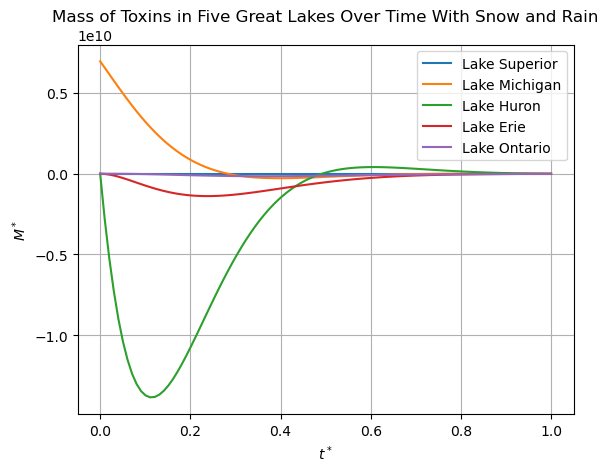

<Figure size 2000x1000 with 0 Axes>

In [36]:
# M[0] = M_s, M[1] = M_m, M[2] = M_h, M[3] = M_e, M[4] = M_o
def f(M,t):
    dMdt = np.array([0.,0.,0.,0.,0.])
    dMdt[0] = 1 - (Q_sh * (V_h + V_f) * M[0])/(Q_he * (V_s + V_f))
    dMdt[1] = (I_m * Q_he**2 * (V_s + V_f))/(Q_hm * Q_sh * I_s * (V_h + V_f)**2)+M[2]- (Q_mh * (V_h + V_f) * M[1])/(Q_he * (V_m + V_f))  
    dMdt[2] = (I_h * Q_he * (V_s + V_f))/(Q_sh * I_s * (V_h + V_f))+M[0]-(Q_mh * Q_hm * (V_h + V_f)**2 * M[1])/(Q_he**2 * (V_m + V_f)) -M[2]- (Q_hm * M[2])/Q_he
    dMdt[3] = (I_e * Q_he * (V_s + V_f))/(Q_sh * I_s * (V_h + V_f)) + M[2] -(Q_eo * (V_h + V_f)* M[3])/(Q_he * (V_e + V_f))
    dMdt[4] = (I_o * Q_he**2 * (V_e + V_f) * (V_s + V_f))/(I_s * (V_h + V_f)**2 * Q_eo * Q_sh)+M[3]- (Q_or * (V_h + V_f)* M[4])/(Q_he * (V_o + V_f))
    
    return dMdt
    
#initial condition
M0 = [(M_s0 * Q_he)/(I_s*(V_h + V_f)),
      (M_m0 * Q_he**3 * (V_s+ V_f))/(Q_hm*Q_sh*(V_h + V_f) * I_s),
      (M_h0 * Q_he**2 * (V_s+ V_f))/(Q_sh*(V_h + V_f)**2 * I_s),
      (M_e0 * Q_he**2 * (V_s+ V_f))/(Q_sh*(V_h + V_f)**2 * I_s),
      (M_o0 * Q_he**3 * (V_s+ V_f)*(V_e+ V_f))/(Q_eo*Q_sh*(V_h + V_f)**3* I_s)]
#time vector
t = np.linspace(0,1,100)
#DE solution
M = spi.odeint(f,M0,t)

# plot 
plt.plot(t,M[:,0],t,M[:,1],t,M[:,2],t,M[:,3],t,M[:,4])
plt.grid(True)
plt.title('Mass of Toxins in Five Great Lakes Over Time With Snow and Rain')
plt.legend(['Lake Superior','Lake Michigan','Lake Huron','Lake Erie','Lake Ontario'])
plt.xlabel('$t^*$')
plt.ylabel('$M^*$')
plt.figure(figsize=(20,10))
plt.show()

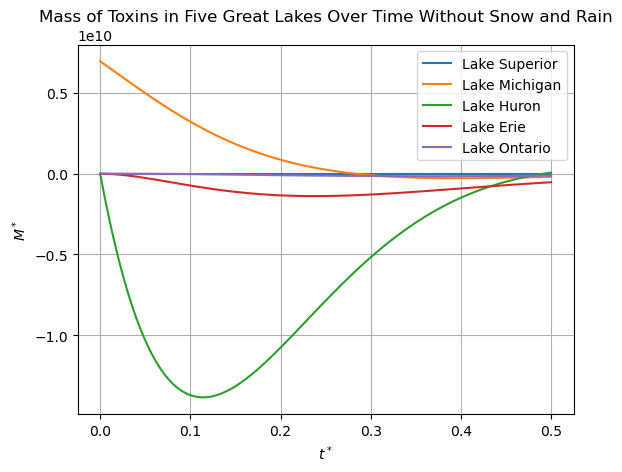

<Figure size 2000x1000 with 0 Axes>

In [32]:
V_r = 0
V_sn = 0
M = spi.odeint(f,M0,t)

plt.plot(t,M[:,0],t,M[:,1],t,M[:,2],t,M[:,3],t,M[:,4])
plt.grid(True)
plt.title('Mass of Toxins in Five Great Lakes Over Time Without Snow and Rain')
plt.legend(['Lake Superior','Lake Michigan','Lake Huron','Lake Erie','Lake Ontario'])
plt.xlabel('$t^*$')
plt.ylabel('$M^*$')
plt.figure(figsize=(20,10))
plt.show()

#### Initial Mass of Toxins:

Since the data of rate of toxin on each lake isn't available, we use the toxic chemical status (From 2022) to compute the rate of toxins, 
Status Rank Value:
- Good: 1
- Fair: 2
- Poor: 3

Each lake's toxic chemical status :
- Lake Superior: 2
- Lake Michigan: 2
- Lake Huron: 1
- Lake Erie: 2
- Lake Ontario: 2

Toxicity dose from toxicity classes: Gosselin, Smith, and Hodge; Slightly Toxic (value: 1): 10 g/kg.

Each lakes's initial mass of toxins (estimation), with assumption of density of water = 997 $kg/m^3$:
- Lake Superior: $2 \cdot 10$ $g/kg \cdot 997$ $kg/m^3 \cdot 12,232,000,000,000$ $m^3 \cdot 0.001$ $kg/g = 243,906,080,000,000$ $kg$
- Lake Michigan: $2 \cdot 10$ $g/kg \cdot 997$ $kg/m^3 \cdot 4,918,000,000,000$ $m^3 \cdot 0.001$ $kg/g = 98,064,920,000,000$ $kg$
- Lake Huron: $1 \cdot 10$ $g/kg \cdot 997$ $kg/m^3 \cdot 3,538,000,000,000$ $m^3 \cdot 0.001$ $kg/g = 35,273,860,000,000$ $kg$
- Lake Erie: $2 \cdot 10$ $g/kg \cdot 997$ $kg/m^3 \cdot 483,000,000,000$ $m^3 \cdot 0.001$ $kg/g = 9,631,020,000,000$ $kg$
- Lake Ontario: $2 \cdot 10$ $g/kg \cdot 997$ $kg/m^3 \cdot 1,639,000,000,000$ $m^3 \cdot 0.001$ $kg/g = 32,681,660,000,000$ $kg$


#### Rate of Toxins:

To get the rate of toxins, we will divide mass flow rate [$g/s$] to toxicity dose [$g/kg$]. 
The mass flow rate will be density [$kg/m^3$] times flow rate (Q) [$m^3/s$]:
- Lake Superior: $997$ $kg/m^3 \cdot 1,820$ $m^3/s \cdot 1000$ $g/kg = 1,814,540,000$ $g/s$
- Lake Michigan: $997$ $kg/m^3 \cdot 40,000$ $m^3/s \cdot 1000$ $g/kg = 39,880,000,000$ $g/s$
- Lake Huron: $997$ $kg/m^3 \cdot 5,200$ $m^3/s \cdot 1000$ $g/kg = 5,184,400,000$ $g/s$
- Lake Erie: $997$ $kg/m^3 \cdot 5,796$ $m^3/s \cdot 1000$ $g/kg = 5,778,612,000$ $g/s$
- Lake Ontario: $997$ $kg/m^3 \cdot 17,600$ $m^3/s \cdot 1000$ $g/kg = 17,547,200,000$ $g/s$

The rate of toxin for each lake:
- Lake Superior: $\frac{1,814,540,000 g/s}{2 \cdot 10 g/kg}$ = 90,727,000 $kg/s$
- Lake Michigan: $\frac{39,880,000,000 g/s}{2 \cdot 10 g/kg}$ = 3,988,000,000 $kg/s$
- Lake Huron: $\frac{5,184,400,000 g/s}{1 \cdot 10 g/kg}$ = 259,220,000 $kg/s$
- Lake Erie: $\frac{5,778,612,000 g/s}{2 \cdot 10 g/kg}$ = 288,930,600 $kg/s$
- Lake Ontario: $\frac{17,547,200,000 g/s}{2 \cdot 10 g/kg}$ = 877,360,000 $kg/s$

<br/>

### Conclusion and Report

Based on the solutions above, Lake Michigan will have the most toxins over time. This makes sense because it only gets and gives the toxins to Lake Huron. Another factor might be that the initial condition of Lake Michigan is worse than any other lake, thus making it the most toxic. The lake with the most minor toxins over time will be Lake Huron. This also makes sense since it continuously gives and gets toxins to/from Lake Michigan while giving to other lakes as well, and the initial condition for Lake Huron is better than Lake Michigan. However, notice in the graph that it contains the negative value of toxins. This is probably because our parameters, especially the rate of toxin and initial mass of each lake, aren't that accurate. Lastly, we compared the toxins during Summer, when there is little to no rain or snow, and during fall/winter, when there is snow or rain. The result is as expected: fresh water from rain or snow will contribute little since it is so tiny compared to the size of the lakes.

<br />

### Bibliography

- [1] US Department of Commerce, NOAA. “About Our Great Lakes : Lake by Lake Profiles.” Www.glerl.noaa.gov, www.glerl.noaa.gov/education/ourlakes/lakes.html. Accessed 20 Oct. 2024.
- [2] Norton, Parker A, et al. “Climate, Streamflow, and Lake-Level Trends in the Great Lakes Basin of the United States and Canada, Water Years 1960–2015.” Scientific Investigations Report, 1 Jan. 2019, https://doi.org/10.3133/sir20195003. Accessed 20 Oct. 2024.
- [3] GLISA. “Lake-Effect Snow in the Great Lakes Region.” Umich.edu, 2017, glisa.umich.edu/resources-tools/climate-impacts/lake-effect-snow-in-the-great-lakes-region/. Accessed 20 Oct. 2024.
- [4] US Department of Commerce, NOAA. “Straits of Mackinac Research.” Www.glerl.noaa.gov, www.glerl.noaa.gov/res/straits/. Accessed 20 Oct. 2024.
- [5] International Joint Commision. “Update on Lake Superior Outflows and Expected Conditions - March 2024.” International Joint Commission, 2024, www.ijc.org/en/lsbc/update-lake-superior-outflows-and-expected-conditions-march-2024. Accessed 20 Oct. 2024.
- [6] U.S. Department of Commerce, et al. 2024 (54 Th ) Edition National Oceanic and Atmospheric Administration (NOAA) National Ocean Service Coast Pilot ®. 2024.
- [7] USGS. “Water-Data Report NY-03-3.” Usgs.gov, 2016, pubs.usgs.gov/wdr/wdr-ny-03-3/. Accessed 20 Oct. 2024.
- [8] Galbraith, Peter, et al. “Physical Oceanographic Conditions in the Gulf of St. Lawrence during 2023.” Publications.gc.ca, 2023, publications.gc.ca/site/eng/9.938387/publication.html?wbdisable=true. Accessed 20 Oct. 2024.
- [9] EPA. State of the Great Lakes 2022 Report. 2022.
- [10] Government of Canada, Canadian Centre for Occupational Health and Safety. “CCOHS: What Is a LD50 and LC50?” Www.ccohs.ca, 2 Mar. 2023, www.ccohs.ca/oshanswers/chemicals/ld50.html#section-1-hdr. Accessed 20 Oct. 2024.